In [2]:
import datetime
import pandas
import seaborn as sns
from davitpy import pydarn
from davitpy import gme
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
from matplotlib.dates import date2num, DateFormatter, MinuteLocator
from matplotlib.ticker import FuncFormatter, MaxNLocator
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Plotting TEC Maps

The format of the tec-medFilt-YYYYMMDD.txt is as follows:
1. First column is date in YYYYMMDD format
2. Second column is time in hhmm format where hh is hour and mm is minutes. If the value is 10 then it means 0010 (00:10 mins).
3. Third column represents the magnetic latitude values
4. Fourth column represents the magnetic longitude values
5. Fifth column represents the actual TEC (total electron content) values
6. Sixth and seventh columns represent the degree of latitude and longitude

In [3]:
# function to convert tec date, time string to python datetime obj
def convert_to_datetime(row):
    currDateStr = str( int( row["dateStr"] ) )
    if row["timeStr"] < 10:
        currTimeStr = "000" + str( int( row["timeStr"] ) )
    elif row["timeStr"] < 100:
        currTimeStr = "00" + str( int( row["timeStr"] ) )
    elif row["timeStr"] < 1000:
        currTimeStr = "0" + str( int( row["timeStr"] ) )
    else:
        currTimeStr = str( int( row["timeStr"] ) )  
    #print datetime.datetime.strptime( currDateStr+ ":" + currTimeStr, "%Y%m%d:%H%M" )
    return datetime.datetime.strptime( currDateStr+ ":" + currTimeStr, "%Y%m%d:%H%M" )

In [4]:
#loading the TEC data into pandas dataframe
#initializing the columns in the table
inpColList = [ "dateStr", "timeStr", "Mlat", "Mlon", "med_tec", "dlat", "dlon" ]
inpFile = "/home/sneha/GSocProjectSpaceVT/dataset/med_filt_tec/tec-medFilt-20150101.txt"
medFiltTECDF = pandas.read_csv(inpFile, delim_whitespace=True, header=None, names=inpColList)
medFiltTECDF["date"] = medFiltTECDF.apply(convert_to_datetime, axis=1)

In [5]:
#selecting the longitudes in the north-american sector
longitudes = list(range(250, 362, 2)) + list(range(0, 35, 2))
print longitudes
#selecting only those rows whose longitudes is in the range of north-american sector
selectedmedFiltTECDF = medFiltTECDF[medFiltTECDF["Mlon"].isin(longitudes)]
#printing the shape of the selected rows
print selectedmedFiltTECDF.shape
#total shape of the TEC file
print medFiltTECDF.shape

[250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34]
(897994, 8)
(2038395, 8)


In [65]:
#initializing the datetime variable which will be used for selecting values from the table
date = datetime.datetime.strptime( "20150101"+ ":" + "235", "%Y%m%d:%H%M" )
#selecting those rows where the datetime gives the time with the longitudes are in the given range and latitude = 11
print medFiltTECDF[(medFiltTECDF["Mlat"]==11.00) & (medFiltTECDF["Mlon"].isin(longitudes)) & (medFiltTECDF["date"]==date)]

          dateStr  timeStr  Mlat   Mlon  med_tec  dlat  dlon  \
1957385  20150101     2305  11.0    0.0     38.3   1.0   2.0   
1957386  20150101     2305  11.0    2.0     38.8   1.0   2.0   
1957387  20150101     2305  11.0    4.0     38.3   1.0   2.0   
1957388  20150101     2305  11.0    6.0     36.8   1.0   2.0   
1957389  20150101     2305  11.0    8.0     32.7   1.0   2.0   
1957390  20150101     2305  11.0   10.0     30.7   1.0   2.0   
1957391  20150101     2305  11.0   12.0     25.3   1.0   2.0   
1957392  20150101     2305  11.0   14.0     22.5   1.0   2.0   
1957393  20150101     2305  11.0   16.0     19.2   1.0   2.0   
1957394  20150101     2305  11.0   18.0     17.5   1.0   2.0   
1957395  20150101     2305  11.0   20.0     17.0   1.0   2.0   
1957396  20150101     2305  11.0   22.0     17.0   1.0   2.0   
1957397  20150101     2305  11.0   24.0     16.1   1.0   2.0   
1957398  20150101     2305  11.0   26.0     15.0   1.0   2.0   
1957399  20150101     2305  11.0   28.0 

In [66]:
#populating the TEC maps in a matrix format. The rows corresponds to latitudes and columns corresponds to longitudes
#Number of latitdues = (89-11) + 1 = 79, number of longitudes = (34-0)/2 + (360-250)/2 + 1 = 73. (number of longitudes is divided by 2 as the degree of longitudes is 2)
#values in the TEC maps are stored from (250 to 360) then (0 to 34)
tec2d = np.zeros((79,73))
longi = list(range(0, 35, 2))
for i in range(0, 79):
    selected = medFiltTECDF[(medFiltTECDF["Mlat"]==i+11) & (medFiltTECDF["Mlon"].isin(longitudes)) & (medFiltTECDF["date"]==date)]
    tec = []
    for index, row in selected.iterrows():
        if(int(row["Mlon"]) in longi):
            j = int(row["Mlon"])/2 + 55
        else:
            j = ((int(row["Mlon"]) - 250)/2)
        tec2d[i][j] = float(row["med_tec"])
print tec2d.shape        

(79, 73)


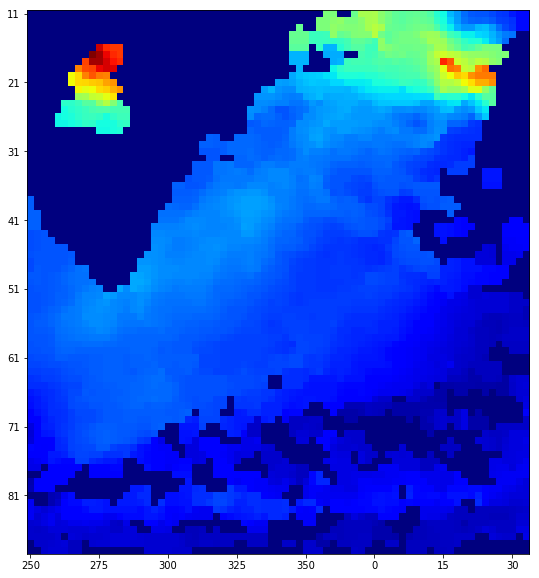

In [67]:
#plotting the TEC map 
fig, ax = plt.subplots(1,1, figsize=(14, 10))
x = list(range(225, 360, 25)) + list(range(0, 35, 15)) 
y = list(range(1, 90, 10))
ax.set_xticklabels(tuple(x))
ax.set_yticklabels(y)
plt.imshow(tec2d, cmap='jet', interpolation='nearest')
fig.savefig('0235.png', dpi=fig.dpi)
plt.show()

In [143]:
#command to take the plots and convert it into a movie
import os
os.system("ffmpeg -r 1 -i img%01d.png -vcodec mpeg4 -y movie.mp4")

256

# Exogenous variables

The set of exogenous variables that we are going to use are: AU-Index, AL-index, Sym-H index, AsyH-index, OMNI IMF Bz, By, Vx, np, f10.7, dipole tilt